# Hidden Markov Models - Alpha and Beta

This notebook overviews two slightly different quantitites often used in the analysis of Hidden Markov Models, $\alpha$ and $\beta$. These terms are, respectively, very conceptually similar to the forward and backward probabilities, but are specifically, their 'conditionally reversed' probabilities

$$ \alpha_t(i) \propto P(Y^{t} | x_t = i) $$
$$ \beta_t(i) \propto P(Y^{[t+1 , T]} | x_t = i) $$

Again, both of these quantities are calculated in a recursive fashion (through a process explained in more depth in a supporting document). The reason that we discuss these quantities here, is that they have a relatively deep link with common derivations of the likelihood-based optimization methods common in HMMs. Specifically, one can show that the total likelihood function $\mathcal{L}(\theta)$ is simply the product  $\sum_i \alpha_t(i)\beta_t(i)$ (which turns out to be independent of $t$).  Furthremore, the most common version of the Expectation Maximization algorithm used in HMMs is conveniently described in terms of the $\alpha$ and $\beta$ terms as well (which we will discuss in a later notebook).

Here, we simply show how to calculate both terms, perform some tests to verify their correctness, and povide a small discussion around their interpretation.

In [1]:
# First, import the necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='hls')

from hidden_py import dynamics, infer

# Initialize the HMM
hmm = dynamics.HMM(2, 2)
hmm.init_uniform_cycle(trans_rate=0.1, error_rate=0.2)

# Run the dynamics
hmm.run_dynamics(100)

# Fetch the states or observations
state_ts = hmm.state_ts
obs_ts = hmm.obs_ts

In [2]:
# First, initialize the inferrence object
inf = infer.MarkovInfer(2, 2)

# Now, we can calcualte the alpha and beta values but simply calling the funcitons
inf.alpha(obs_ts, hmm.A, hmm.B)
inf.beta(obs_ts, hmm.A, hmm.B)

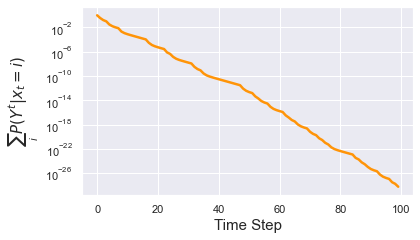

In [3]:
# Now, we can look at the alpha and beta values
alpha_n = [sum(lkly) for lkly in inf.alpha_tracker]

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

ax.plot(alpha_n, linewidth=2.5, color=sns.xkcd_rgb["tangerine"])
ax.set_xlabel(r"Time Step", fontsize=15)
ax.set_ylabel(r"$\sum_i P(Y^t | x_t = i)$", fontsize=15)
ax.set_yscale('log')
plt.tight_layout()
plt.show()

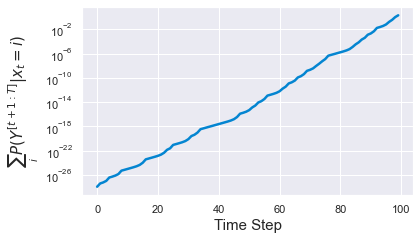

In [4]:

beta_n = [sum(lkly) for lkly in inf.beta_tracker]

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

ax.plot(beta_n, linewidth=2.5, color=sns.xkcd_rgb["cerulean"])
ax.set_xlabel(r"Time Step", fontsize=15)
ax.set_ylabel(r"$\sum_i P(Y^{[t+1 : T]} | x_t = i)$", fontsize=15)
ax.set_yscale('log')
plt.tight_layout()
plt.show()

(5.632479980763646e-29, 6.884142198711132e-29)

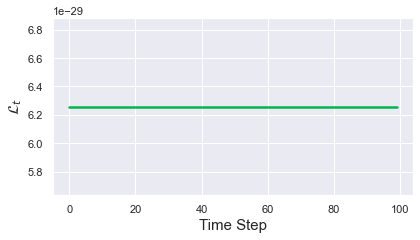

In [5]:
# Now, we can check this calculation (to some extent), by calculating the
# likelihood from alpha and beta, and showing that the calcualted value is
# independent of time

partial_likely = [sum(a * b) for (a, b) in zip(inf.alpha_tracker, inf.beta_tracker)]

fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))

ax.plot(partial_likely, linewidth=2.5, color=sns.xkcd_rgb["shamrock"])
ax.set_xlabel(r"Time Step", fontsize=15)
ax.set_ylabel(r"$\mathcal{L}_t$", fontsize=15)
plt.tight_layout()

ax.set_ylim([0.9 * np.min(partial_likely), 1.1 * np.max(partial_likely)])

From these results, we can see that the prodict of the terms is, in fact, constant and intependent of $t$. This value of the likelihood measure is what we will often be interested in going forward. We can also observe that each of the $\alpha$ and $\beta$ functions is an exponentially decaying or growing function of the time step. This is just because of the whe terms concretely represent. $\alpha$, for instance, is the probability of a sequence of $t$ obserfvations, given that the hidden value is $x_t$ at a particular time. Given that there are an incredibly large number of possible
observation sequences $Y^t$, the proability if any particular one given only a single data point on the hidden system will be exceptionally small. The same rationale holds for the $\beta$ term, but in reverse. Note that for $t=1$, $\alpha_t \propto P(y_1 | x_1)$, which is just a single entry in the observation matrix $\boldsymbol{B}$. 